In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('../data/insurance.csv')

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# EDA

<Axes: >

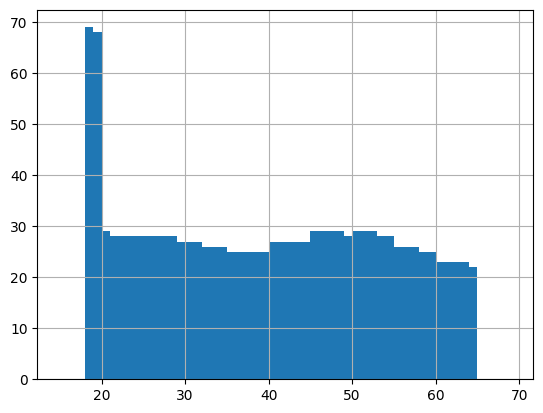

In [4]:
df['age'].hist(bins=np.arange(15,70,1))

<Axes: >

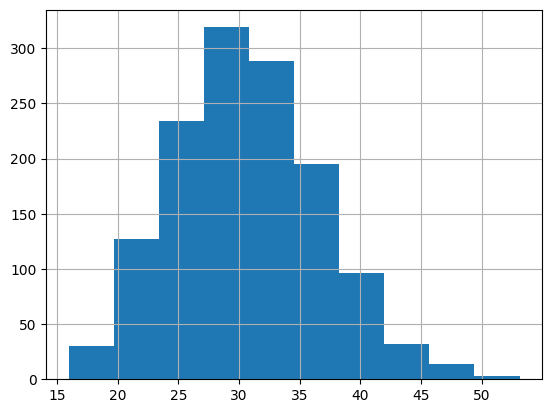

In [5]:
df['bmi'].hist()

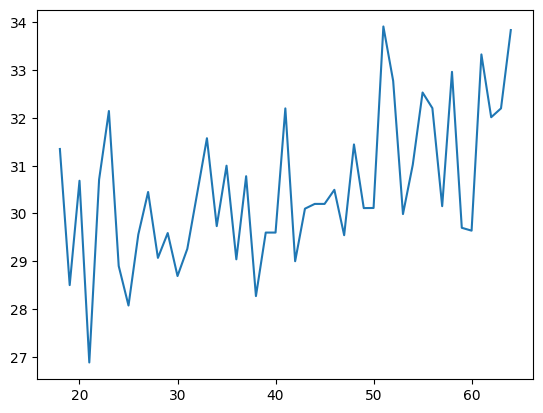

In [6]:
age_groups=df['bmi'].groupby(df['age']).median()
plt.plot(age_groups)

In [7]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df['sex'].drop_duplicates()) 
df['sex'] = le.transform(df['sex'])
# smoker or not
le.fit(df['smoker'].drop_duplicates()) 
df['smoker'] = le.transform(df['smoker'])
# region
le.fit(df['region'].drop_duplicates()) 
df['region'] = le.transform(df['region'])

## Correlation Matrix

In [8]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

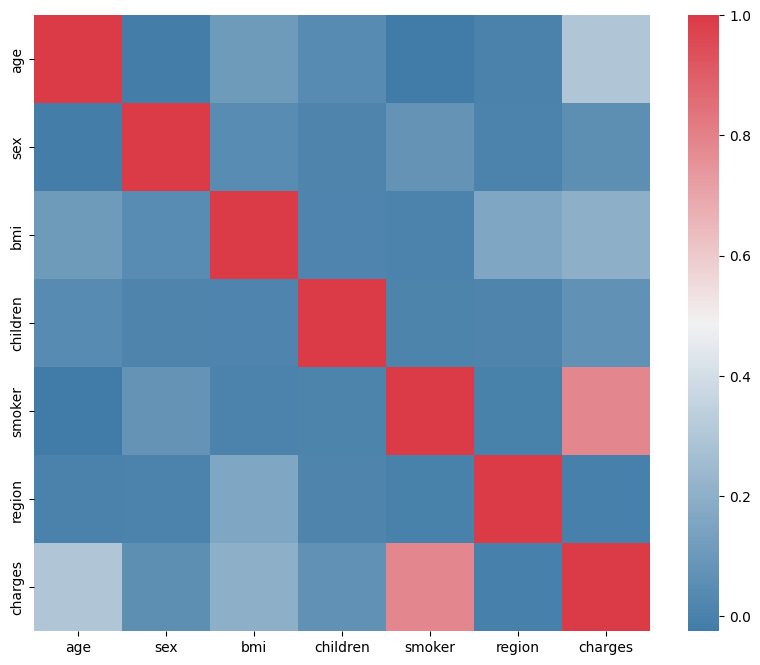

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

## Looking at Distribution of charges

<Axes: >

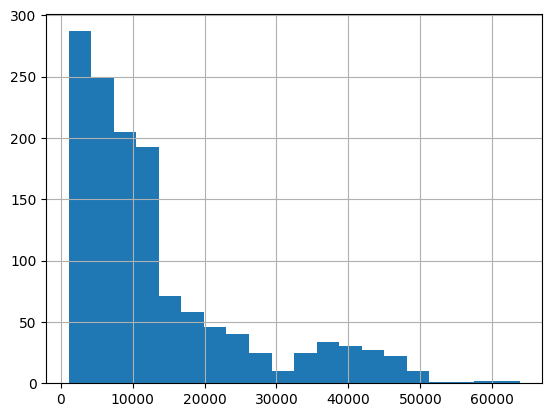

In [10]:
df['charges'].hist(bins=20)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

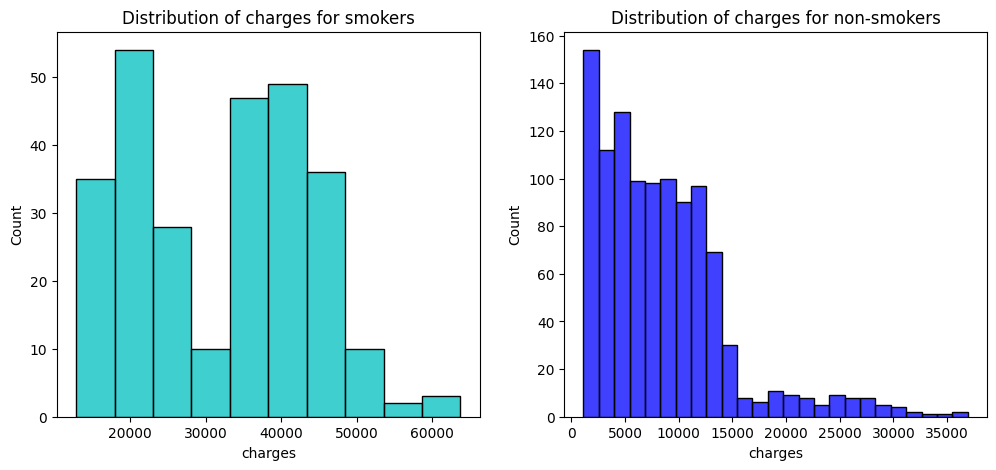

In [11]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(df[(df['smoker'] == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(df[(df['smoker']  == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

# Building the model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [13]:
X = df.drop(['charges','region'], axis = 1)
Y = df['charges']

quad = PolynomialFeatures(degree = 3)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

In [14]:
plr = LinearRegression().fit(X_train,Y_train)

Y_test_pred = plr.predict(X_test)

print('result for linear regression')
print(plr.score(X_test,Y_test))

result for linear regression
0.8810168906745834


In [15]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_test_pred = forest.predict(X_test)

print('MSE test data: %.3f' % (mean_squared_error(Y_test,forest_test_pred)))
print('R2 test data: %.3f' % (r2_score(Y_test,forest_test_pred)))

MSE test data: 18799216.893
R2 test data: 0.881


In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500
